In [279]:
import pandas as pd
import numpy as np

In [281]:
df = pd.read_csv("./fct_invoice.csv")
df_2 = pd.read_json("./dim_customer.json")

# EASY SECTION

### 1. (Easy) How many unique customers are in the dataset?

In [852]:
df_2["customer_names"] = df_2["first_name"] + df_2["last_name"]
df_2["customer_names"].nunique()
# thought of going nunique on the customer_ids, but this seemed more logical 
# since it was asking for how many "unique customers"

4992

The answer to number one (easy) is 4992. I got this by pairing the first names and last names of all of the customers, then stored this into a new column called customer names. Afterwards, I used the nunique function to see how many unique customer names there were.

### 2. (Easy) What are the different categories of products available? How many unique categories are there?

In [859]:
df["category"].value_counts()

category
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: count, dtype: int64

In [289]:
df["category"].nunique()

8

The answer to number two (easy) is 8 based on the number of unique categories. These categories are namely: Clothing, Cosmetics, Food & Bevarage, Toys, Shows, Souveneir, Technology, and Books. I got these by using the value counts function on the "category" column of the invoice data. 

### 3. (Easy) Which payment method is the most popular? How many times was it used?

In [293]:
df["payment_method"].value_counts().idxmax()

'Cash'

In [797]:
# proof of idxmax
df["payment_method"].value_counts()

payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: count, dtype: int64

The answer to number three (easy) is Cash. I got this by using the value counts function to see how many times a specific payment method was used, and then used the idxmax function to return the one with the highest value. 

# MEDIUM SECTION

### 1. (Medium) What are the three most popular categories, by total sales?

In [828]:
df["total_sales"] = df["quantity"]*df["price"]
sales = df.groupby("category").sum()["total_sales"].sort_values(ascending = False)
sales.head(3)

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: total_sales, dtype: float64

In [832]:
# proof of sort values
sales = df.groupby("category").sum()["total_sales"].sort_values(ascending = False)
sales.head(8)

category
Clothing           1.139968e+08
Shoes              6.655345e+07
Technology         5.786235e+07
Cosmetics          6.792863e+06
Toys               3.980426e+06
Food & Beverage    8.495351e+05
Books              8.345529e+05
Souvenir           6.358247e+05
Name: total_sales, dtype: float64

The answers to number one (medium) are the categories: Clothing, Shoes, and Technology. I got this by first making a new column generating the total sales. Afterwards, I did a groupby function to pair up a category with its corresponding total sales value. Then, I sorted these values in descending order. 

### 2. (Medium) What are the total sales attributed to customers over the age of 45?

In [876]:
df_2.rename(columns={"id": "customer_id"}, inplace=True) 
df3 = pd.merge(df, df_2, on = "customer_id", how = "left")
age_col = df3["age"]
age_check = (age_col > 45)
filtered = df3[age_check]
qty = filtered["quantity"]
price = filtered["price"]
sum(qty * price)

82039768.14999625

The answer to number two (medium) is 82039768.14999625

### 3. (Medium) How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

In [310]:
import matplotlib.pyplot as plt

filter_date
1     28891525.59
2     26625090.10
3     21956191.33
4     18715685.98
5     19719331.10
6     18933775.30
7     20378722.63
8     19282361.29
9     18795794.91
10    20545090.43
11    18207139.95
12    19455085.64
Name: total_sales, dtype: float64

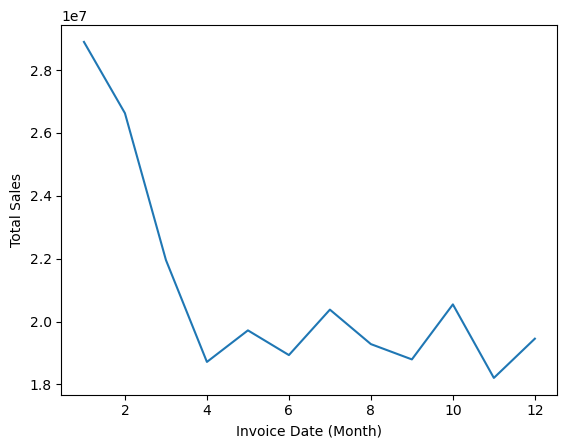

In [880]:
df["total_sales"] = df["quantity"]*df["price"]
df["filter_date"] = pd.to_datetime(df["invoice_date"], format = "%d/%m/%Y")
df.sort_values(by="filter_date", inplace=True)
sales = df.groupby(df.filter_date.dt.month)["total_sales"].sum()
sales.plot()
plt.xlabel("Invoice Date (Month)")
plt.ylabel("Total Sales")
sales

To start, I created a line graph that displays the total amount of sales per month for the entirety of the invoice data. I first created a new column called total sales, and then standardized the dates to a new format. I did a sort value function initially just as a progress check, but decided to not remove it anymore. I then did a groupby function pairing the month with its respective total sales. 

From the graph generated, it would appear that there is a big drop off starting from January. As one can see, the month of January generates the most sales, but after that month, it goes downhill and does not recover at all. Therefore, one can surmise that the peak season for this data happens during the start of the year or January. Even for what is considered the holiday season, i.e., the end of the year a time that is supposed to generate a lot of sales, the graph shows little to no uptick. Nonewithstanding the few small upticks during the months of July and October, the amount of sales for these months are a far cry from the month of January. However, it must also be noted that the first three months (i.e., January, February, and March) all have additional sales data in the invoice csv given that starting from April, no more sales data is available for the rest of the months for 2023. 

# HARD SECTION

### 1. (Hard) Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [885]:
df = pd.read_csv("./fct_invoice.csv")
df_2 = pd.read_json("./dim_customer.json")

In [889]:
df_2.rename(columns={"id": "customer_id"}, inplace=True) 
df3 = pd.merge(df, df_2, on = "customer_id", how = "left")
df3["total_sales"] = df3["quantity"]*df3["price"]
boundary = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
intervals = ["10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89", "90-100"]
df3["age_range"] = pd.cut(df3["age"], bins = boundary, labels = intervals, right = False)
pivot = df3.pivot_table(index = ["category", "age_range"], values = ["total_sales"], aggfunc='sum', fill_value = 0)
pd.set_option("display.max_rows", None)
print(pivot)

                           total_sales
category        age_range             
Books           10-19         12801.75
                20-29         79461.75
                30-39         84143.10
                40-49         87203.40
                50-59         74962.20
                60-69         80476.80
                70-79         54827.85
                80-89         26664.00
                90-100            0.00
Clothing        10-19       1927413.84
                20-29      10250732.80
                30-39      11354126.96
                40-49      11215189.92
                50-59      10321851.76
                60-69      10660642.08
                70-79       7769371.28
                80-89       4493698.00
                90-100            0.00
Cosmetics       10-19        109619.36
                20-29        605915.32
                30-39        723544.70
                40-49        665034.96
                50-59        587780.96
                60-69    